# Star Wars: Which movie is the best of the franchise?

[FiveThirtyEight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) collected data on SurveyMonkey from 835 respondents about their opinions on the Star Wars franchise. We will use this data (available on their [GitHub](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) to do some analysis about which movie from the franchise is the favorite.

In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
star_wars = pd.read_csv("./StarWars.csv", encoding = "ISO-8859-1")

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

## Data Cleaning 

From looking at the first few rows of the data, we can see that there are areas that need to be cleaned. First, there are some RespondentID rows that have an invalid value that should be removed. We can also see that some of the columns are for questions with "Select all that apply", or ranking-type questions. These are spread across multiple columns and can be represented in a better way. 

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [5]:
pd.isnull(star_wars['RespondentID']).sum()

1

In [6]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

In [7]:
pd.isnull(star_wars['RespondentID']).sum()

0

In [8]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [9]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Both of these columns are Yes/No answers, and may even contain N/A values if the respondent decided not to answer. We should convert these columns to Boolean types to make them easier to work with in the future. 

In [10]:
mapping = {
    "Yes": True,
    "No": False,
    np.nan: np.nan
}

In [11]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(mapping)
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(mapping)

In [12]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [13]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

True     552
True     350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [14]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [15]:
name_maps = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}

In [16]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [17]:
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'] = star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].map(name_maps)

In [18]:
star_wars['Unnamed: 4'] = star_wars['Unnamed: 4'].map(name_maps)
star_wars['Unnamed: 5'] = star_wars['Unnamed: 5'].map(name_maps)
star_wars['Unnamed: 6'] = star_wars['Unnamed: 6'].map(name_maps)
star_wars['Unnamed: 7'] = star_wars['Unnamed: 7'].map(name_maps)
star_wars['Unnamed: 8'] = star_wars['Unnamed: 8'].map(name_maps)

In [19]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
})

In [20]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The next few columns ask the respondents to rank the Star Wars films from their favorite to least favorite. We should convert these columns to numeric, and then rename their column names to something more intuitive. 

In [21]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [22]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [23]:
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
})

## Initial Data Exploration

We should explore the data a little bit to get an idea of the demographics of our respondents. The columns we can look at are Gender, Age, Household Income, Education, and Location (Census Region).

Starting with gender and age, we can begin to get an idea of who our respondents are. 

In [24]:
print(star_wars['Gender'].value_counts(dropna = False))
male = star_wars[star_wars['Gender'] == "Male"]
female = star_wars[star_wars['Gender'] == "Female"]
male_per = round(len(male) / len(star_wars) * 100, 2)
female_per = round(len(female) / len(star_wars) * 100, 2)
print(male_per)
print(female_per)

Female    549
Male      497
NaN       140
Name: Gender, dtype: int64
41.91
46.29


In [25]:
print(star_wars['Age'].value_counts(dropna = False))

45-60    291
> 60     269
30-44    268
18-29    218
NaN      140
Name: Age, dtype: int64


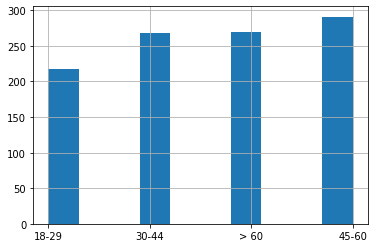

In [26]:
ages = star_wars['Age']
ages.hist()

The data appears to be pretty evenly split between male and female, with slightly more females than males (46% to 42%, with the remainder being non-respondents. About half of respondents are ages 18-44, and the other half are 45+. This seems to be a pretty good representation of a lot of different people, so we will get a lot of different opinions. 140 people chose not to answer both the gender question and the age question.

We can now look at household income and education to get a better idea of the respondents.

In [27]:
star_wars['Household Income'].value_counts(dropna = False)

NaN                    328
$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: Household Income, dtype: int64

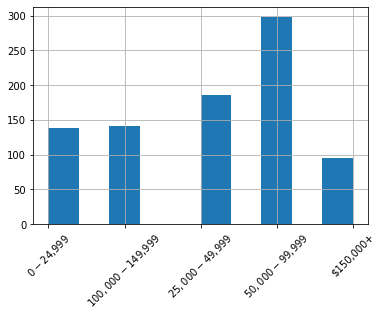

In [28]:
income = star_wars['Household Income']
income.hist(xrot = 45)

A lot of respondents seem to have chosen not to answer this question, but of those who did, the largest group makes about an average salary. 

In [29]:
star_wars['Education'].value_counts(dropna = False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

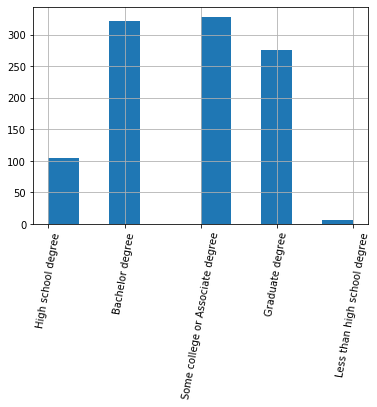

In [30]:
education = star_wars['Education']
education.hist(xrot = 80)

In [31]:
bachelors = star_wars[star_wars['Education'] == 'Bachelor degree']
graduate = star_wars[star_wars['Education'] == 'Graduate degree']
total = len(bachelors) + len(graduate)
per_grads = round(total / len(education) * 100, 2)
print(per_grads)
some_college = star_wars[star_wars['Education'] == 'Some college or Associate degree']
per_some = round(len(some_college) / len(star_wars) * 100, 2)
total_per = per_grads + per_some
print(total_per)

50.25
77.91


Most of the respondents have at least some college, with about 50% of the respondents having a Bachelor's degree or higher, and about 78% of respondents having at least some college. There are only a handful of respondents without a high school degree, and 150 respondents chose not to answer. This is pretty consistent with the income distribution we saw, with a large group making at least average salaries, and some making over 100,000 dollars a year. 

We may use some of this information to subset our data as we go through the analysis.

## Rankings 

Now that the data is cleaned up a bit and we have looked at the demographics of the respondents, we can look at the rankings and viewership of each movie. 

We will start by looking at the overall average ranking for each movie and their overall view counts. 

In [32]:
movie_list = ['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones', 'Star Wars: Episode III  Revenge of the Sith', 'Star Wars: Episode IV  A New Hope', 'Star Wars: Episode V The Empire Strikes Back', 'Star Wars: Episode VI Return of the Jedi']

In [33]:
rankings = star_wars[star_wars.columns[9:15]].mean()
rankings

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

In [34]:
seen = star_wars[star_wars.columns[3:9]].sum()
seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

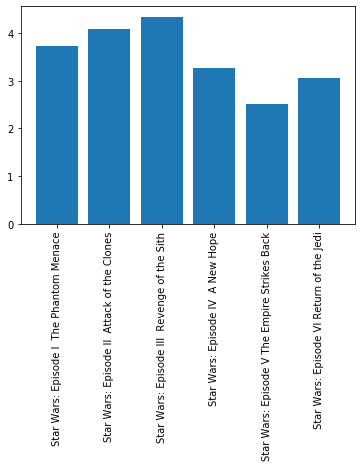

In [35]:
plt.bar(range(6), rankings)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()

Remembering that the three original movies are "Episode IV: A New Hope", "Episode V: The Empire Strikes Back", and "Episode VI: Return of the Jedi", which correspond to the last three columnns in the bar chart, we can see that these are ranked higher on average than the prequel movies. We should recall that a lower average here means that they were ranked higher (i.e. the respondent's top 3 favorite movies). 

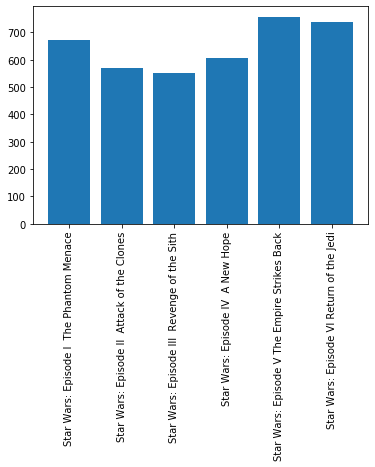

In [36]:
plt.bar(range(6), seen)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()

From the bar chart, it looks like the original movies are the most watched movies (columns 3, 4, and 5). The first prequel movie is also one of the more highly watched movies, with the last two prequel movies dropping in viewership. This could be leading to lower rankings as favorites for the prequel movies, since many people may not have seen all of the prequel movies. It also could be that the first prequel movie was not well received by Star Wars fans, and they did not watch the other two prequel movies after seeing the first. This would be interesting to look into as well. 

### Subsetting

There are a few columns that we can use to subset the data into two columns:

- Male or Female
- Fan of Star Wars (True/False)
- Fan of Star Trek (Yes/No)

We can subset the data and then repeat the above analysis to find the average rankings and the views for each movie. 

In [37]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
star_wars_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
star_wars_not_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]
star_trek_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
star_trek_not_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

In [38]:
male_rankings = males[males.columns[9:15]].mean()
print("Male rankings:")
print(male_rankings)
print("\n")
female_rankings = females[females.columns[9:15]].mean()
print("Female rankings:")
print(female_rankings)

Male rankings:
ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64


Female rankings:
ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64


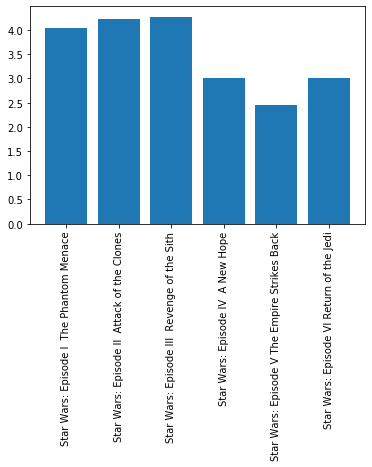

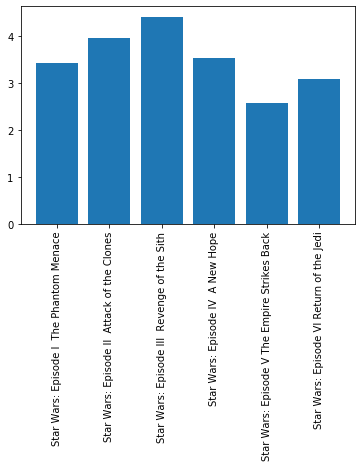

In [39]:
plt.bar(range(6), male_rankings)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()
plt.bar(range(6), female_rankings)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()

In [40]:
male_views = males[males.columns[3:9]].sum()
print("Male view counts:")
print(male_views)
print("\n")
female_views = females[females.columns[3:9]].sum()
print("Female view counts:")
print(female_views)

Male view counts:
seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64


Female view counts:
seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64


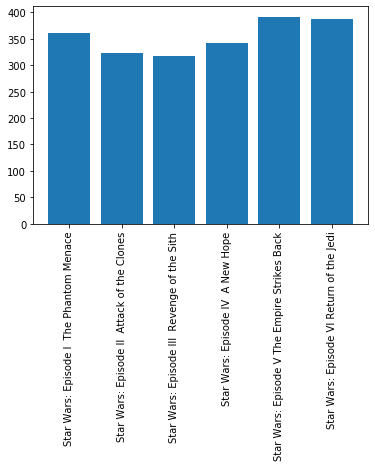

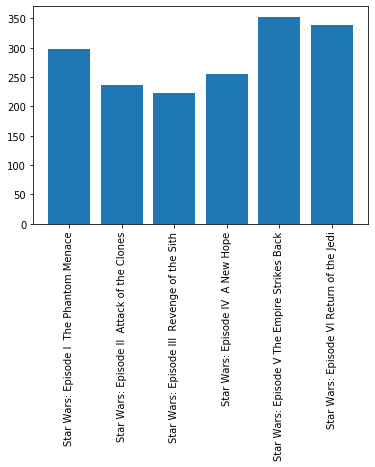

In [41]:
plt.bar(range(6), male_views)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()
plt.bar(range(6), female_views)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()

Comparing the male and female rankings and viewerships, we notice that the trends follow pretty similarly to each other and to the overall charts. We can look at the fans vs non-fans of the Star Wars franchise next. 

In [42]:
star_wars_fans_rankings = star_wars_fan[star_wars_fan.columns[9:15]].mean()
star_wars_not_fans_rankings = star_wars_not_fan[star_wars_not_fan.columns[9:15]].mean()
print("Star Wars fan rankings:")
print(star_wars_fans_rankings)
print("\n")
print("Star Wars not fan rankings:")
print(star_wars_not_fans_rankings)

Star Wars fan rankings:
ranking_1    4.141304
ranking_2    4.342391
ranking_3    4.417423
ranking_4    2.932971
ranking_5    2.333333
ranking_6    2.829710
dtype: float64


Star Wars not fan rankings:
ranking_1    2.936396
ranking_2    3.591549
ranking_3    4.193662
ranking_4    3.933099
ranking_5    2.862676
ranking_6    3.471831
dtype: float64


In [43]:
star_wars_fans_views = star_wars_fan[star_wars_fan.columns[3:9]].sum()
star_wars_not_fans_views = star_wars_not_fan[star_wars_not_fan.columns[3:9]].sum()
print("Star Wars fan view counts:")
print(star_wars_fans_views)
print("\n")
print("Star Wars not fan view counts:")
print(star_wars_not_fans_views)

Star Wars fan view counts:
seen_1    500
seen_2    463
seen_3    450
seen_4    483
seen_5    538
seen_6    537
dtype: int64


Star Wars not fan view counts:
seen_1    173
seen_2    108
seen_3    100
seen_4    124
seen_5    220
seen_6    201
dtype: int64


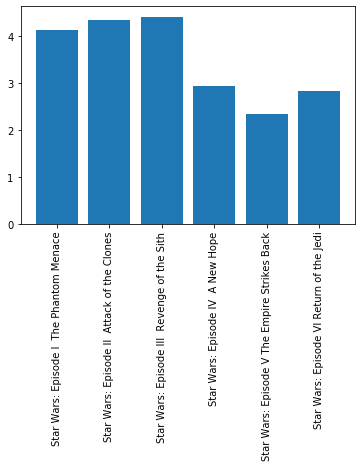

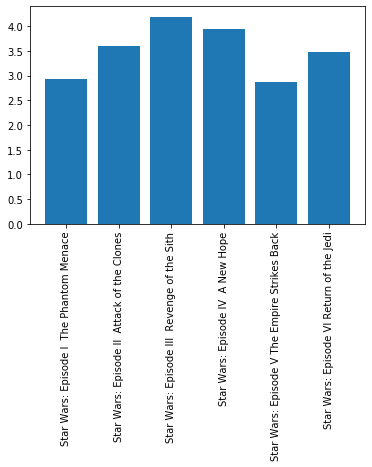

In [44]:
plt.bar(range(6), star_wars_fans_rankings)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()
plt.bar(range(6), star_wars_not_fans_rankings)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()

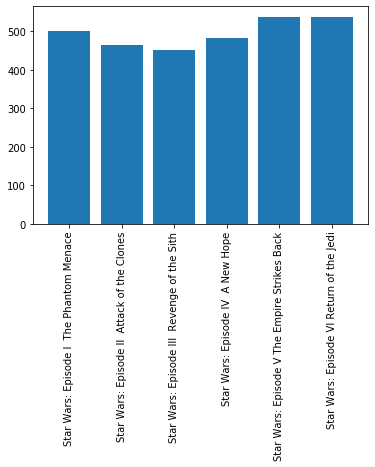

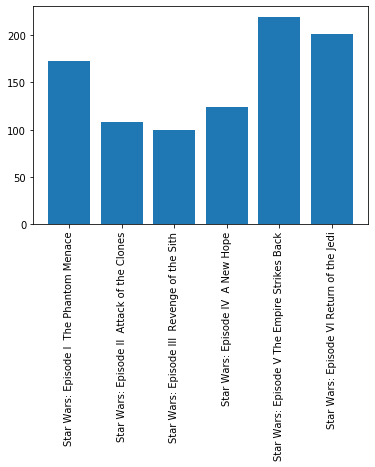

In [45]:
plt.bar(range(6), star_wars_fans_views)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()
plt.bar(range(6), star_wars_not_fans_views)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()

Interestingly, the fans vs not fans favorite movie rankings follow the same distribution, and they follow the overall rankings as well. The viewership for not fans is relatively high for the second and third original movies, and very low for the first original movie, and the second and third prequel movies. Next, we will look at the average rankings and views for star trek fans vs not fans.  

In [46]:
star_trek_fans_rankings = star_trek_fan[star_trek_fan.columns[9:15]].mean()
print("Star Trek fan rankings:")
print(star_trek_fans_rankings)
print("\n")
star_trek_not_fans_rankings = star_trek_not_fan[star_trek_not_fan.columns[9:15]].mean()
print("Star Trek not fan rankings:")
print(star_trek_not_fans_rankings)

Star Trek fan rankings:
ranking_1    3.968675
ranking_2    4.255422
ranking_3    4.403382
ranking_4    3.110843
ranking_5    2.407229
ranking_6    2.850602
dtype: float64


Star Trek not fan rankings:
ranking_1    3.487864
ranking_2    3.915254
ranking_3    4.278450
ranking_4    3.433414
ranking_5    2.634383
ranking_6    3.244552
dtype: float64


In [47]:
star_trek_fans_views = star_trek_fan[star_trek_fan.columns[3:9]].sum()
print("Star Trek fan view counts:")
print(star_trek_fans_views)
print("\n")
star_trek_not_fans_views = star_trek_not_fan[star_trek_not_fan.columns[3:9]].sum()
print("Star Trek not fan view counts:")
print(star_trek_not_fans_views)

Star Trek fan view counts:
seen_1    364
seen_2    336
seen_3    322
seen_4    342
seen_5    397
seen_6    396
dtype: int64


Star Trek not fan view counts:
seen_1    301
seen_2    228
seen_3    221
seen_4    258
seen_5    353
seen_6    334
dtype: int64


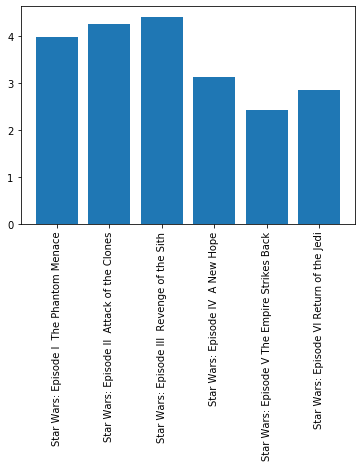

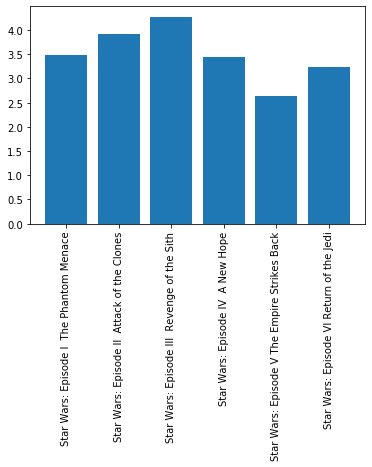

In [48]:
plt.bar(range(6), star_trek_fans_rankings)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()
plt.bar(range(6), star_trek_not_fans_rankings)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()

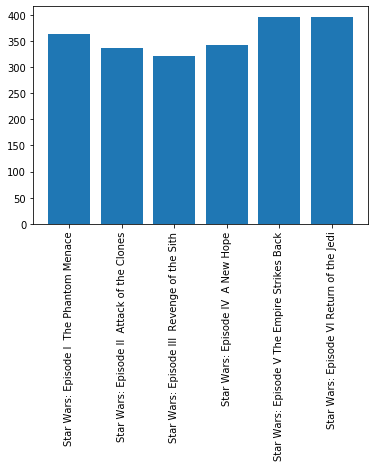

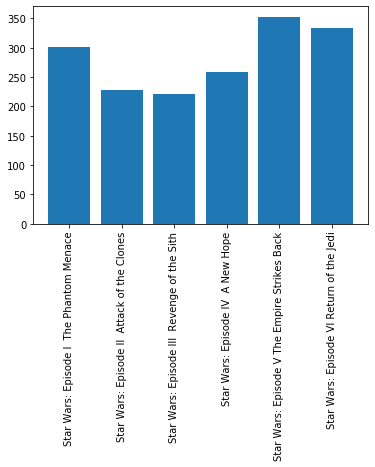

In [49]:
plt.bar(range(6), star_trek_fans_views)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()
plt.bar(range(6), star_trek_not_fans_views)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()

The distribution of favorite movie is the same regardless of being a Star Trek fan or not, and it also follows the overall favorite distribution. The viewership is pretty interesting, with Star Trek fans having a very high viewership for all of the movies, closely matching that of the viewership distribution for Star Wars fans. Not Star Trek fans had lower viewerships for the last two prequel movies, following the distribution of the overall viewership. It would be interesting to look into how many of each group there are (how many Star Wars fans vs not Star Wars fans, how many Star Trek fans vs not Star Trek fans, and see what the overlap is for each franchise as well. 


### Star Wars fans vs. Star Trek fans

In [50]:
star_wars_yes_star_trek_yes = star_wars_fan[star_wars_fan["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
star_wars_yes_star_trek_no = star_wars_fan[star_wars_fan["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]
star_wars_no_star_trek_no = star_trek_not_fan[star_trek_not_fan["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]
star_wars_no_star_trek_yes = star_trek_fan[star_trek_fan["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

In [51]:
print(len(star_wars_yes_star_trek_yes))
print(len(star_wars_yes_star_trek_no))
print(len(star_wars_no_star_trek_yes))
print(len(star_wars_no_star_trek_no))

370
175
45
238


Most of the respondents appear to consider themselves fans of both Star Wars and Star Trek, respondents who are fans of neither. Some respondents are fans of Star Wars and not Star Trek, and very few respondents are fans of Star Trek and not of Star Wars. 

We can create bar plots to compare the rankings and viewerships for each of these groups.

In [52]:
star_wars_yes_star_trek_yes_rankings = star_wars_yes_star_trek_yes[star_wars_yes_star_trek_yes.columns[9:15]].mean()
print(star_wars_yes_star_trek_yes_rankings)
star_wars_yes_star_trek_yes_views = star_wars_yes_star_trek_yes[star_wars_yes_star_trek_yes.columns[3:9]].sum()
print(star_wars_yes_star_trek_yes_views)

ranking_1    4.081081
ranking_2    4.329730
ranking_3    4.428184
ranking_4    3.021622
ranking_5    2.367568
ranking_6    2.767568
dtype: float64
seen_1    333
seen_2    313
seen_3    304
seen_4    317
seen_5    360
seen_6    361
dtype: int64


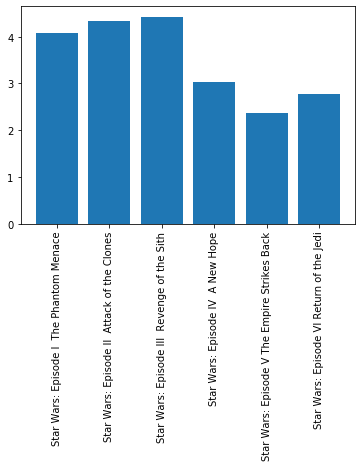

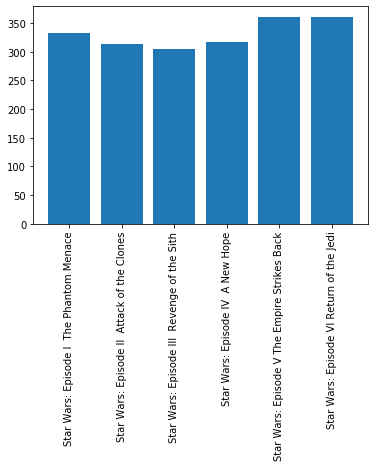

In [53]:
plt.bar(range(6), star_wars_yes_star_trek_yes_rankings)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()
plt.bar(range(6), star_wars_yes_star_trek_yes_views)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()

In [54]:
star_wars_no_star_trek_no_rankings = star_wars_no_star_trek_no[star_wars_no_star_trek_no.columns[9:15]].mean()
print(star_wars_no_star_trek_no_rankings)
star_wars_no_star_trek_no_views = star_wars_no_star_trek_no[star_wars_no_star_trek_no.columns[3:9]].sum()
print(star_wars_no_star_trek_no_views)

ranking_1    2.915612
ranking_2    3.579832
ranking_3    4.189076
ranking_4    3.941176
ranking_5    2.894958
ranking_6    3.466387
dtype: float64
seen_1    141
seen_2     85
seen_3     82
seen_4     99
seen_5    182
seen_6    165
dtype: int64


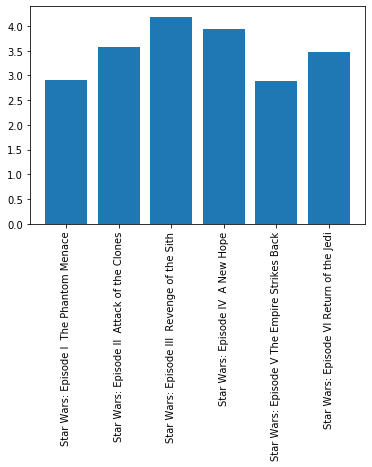

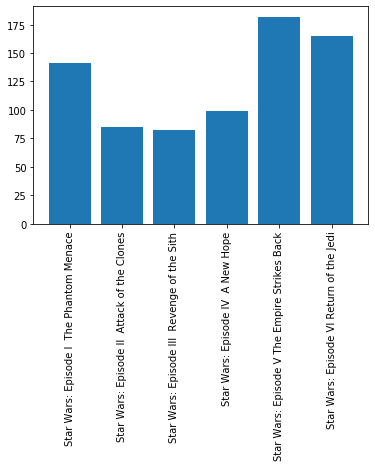

In [55]:
plt.bar(range(6), star_wars_no_star_trek_no_rankings)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()
plt.bar(range(6), star_wars_no_star_trek_no_views)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()

Comparing fans of both franchises vs fans of neither, we can see that the second movie of the original trilogy is still the favorite among both groups. Viewership from fans of neither is low, especially for the prequel movies. Viewership for all movies is high for fans of both franchises. 

In [56]:
star_wars_yes_star_trek_no_rankings = star_wars_yes_star_trek_no[star_wars_yes_star_trek_no.columns[9:15]].mean()
print(star_wars_yes_star_trek_no_rankings)
star_wars_yes_star_trek_no_views = star_wars_yes_star_trek_no[star_wars_yes_star_trek_no.columns[3:9]].sum()
print(star_wars_yes_star_trek_no_views)

ranking_1    4.262857
ranking_2    4.371429
ranking_3    4.400000
ranking_4    2.742857
ranking_5    2.280000
ranking_6    2.942857
dtype: float64
seen_1    160
seen_2    143
seen_3    139
seen_4    159
seen_5    171
seen_6    169
dtype: int64


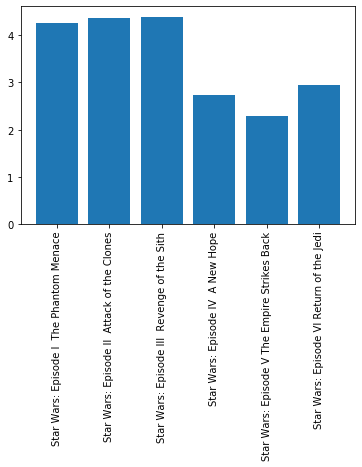

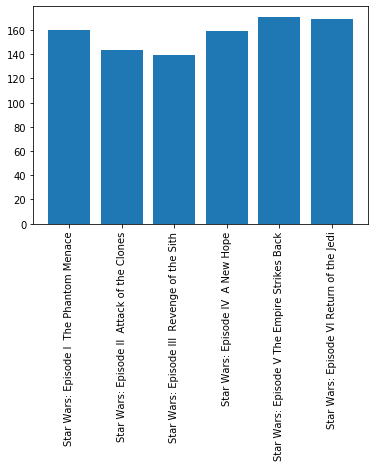

In [57]:
plt.bar(range(6), star_wars_yes_star_trek_no_rankings)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()
plt.bar(range(6), star_wars_yes_star_trek_no_views)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()

In [58]:
star_wars_no_star_trek_yes_rankings = star_wars_no_star_trek_yes[star_wars_no_star_trek_yes.columns[9:15]].mean()
print(star_wars_no_star_trek_yes_rankings)
star_wars_no_star_trek_yes_views = star_wars_no_star_trek_yes[star_wars_no_star_trek_yes.columns[3:9]].sum()
print(star_wars_no_star_trek_yes_views)

ranking_1    3.044444
ranking_2    3.644444
ranking_3    4.200000
ranking_4    3.844444
ranking_5    2.733333
ranking_6    3.533333
dtype: float64
seen_1    31
seen_2    23
seen_3    18
seen_4    25
seen_5    37
seen_6    35
dtype: int64


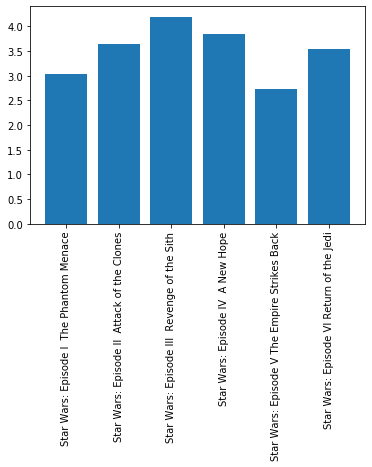

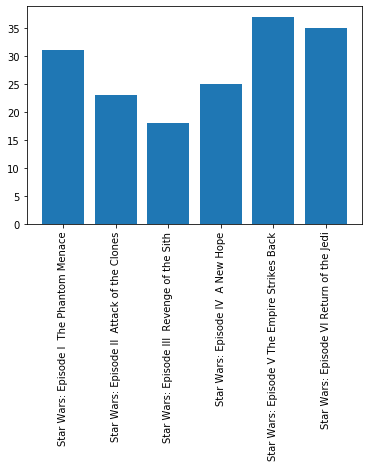

In [59]:
plt.bar(range(6), star_wars_no_star_trek_yes_rankings)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()
plt.bar(range(6), star_wars_no_star_trek_yes_views)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()

Comparing Star Wars only fans to Star Trek only fans, we can see that the second movie in the original triology is still the favorite. The favorite rankings are roughly the same distributions, and they follow the overall distribution as well. Viewership for Star Trek only fans is very low, especially for the prequel movies, while viewership for all movies for Star Wars only fans is high. 

Next, we'll look at the rankings for respondents who have seen all 6 movies. 

In [60]:
def seen_counts(row):
    movie_count = 0
    seen_cols = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
    for c in seen_cols:
        seen = row[c]
        if pd.isnull(seen) or seen == False:
            continue
        elif seen == True:
            movie_count += 1 
    return movie_count

star_wars['Movie Count'] = star_wars.apply(seen_counts, axis = 1)

In [61]:
seen_all_6 = star_wars[star_wars['Movie Count'] == 6]
seen_all_6_rankings = seen_all_6[seen_all_6.columns[9:15]].mean()
print(seen_all_6_rankings)


ranking_1    4.237792
ranking_2    4.326964
ranking_3    4.253191
ranking_4    2.866242
ranking_5    2.380042
ranking_6    2.932059
dtype: float64


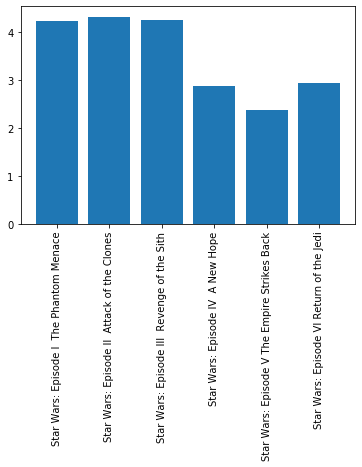

In [62]:
plt.bar(range(6), seen_all_6_rankings)
plt.xticks([0, 1, 2, 3, 4, 5], movie_list, rotation='vertical')
plt.show()

### Ranking Conclusions:

From several subsets and comparisons, "Star Wars Episode V: The Empire Strikes Back" is consistently the favorite movie. 

## Character Favorability

The data includes the opinions of the respondents on several of the characters. We can use this data to answer questions about how characters are viewed by the audience. 

In [63]:
star_wars.iloc[:, 15:29].head(5)

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


Columns 15 - 28 are unnamed in the dataset, but we know from the FiveThirtyEight GitHub data that each of these columns corresponds to a different character from Star Wars and asks the respondent to state if they view the character favorably, unfavorably, or neither. We can clean up  these columns to make it easier to find out which character is the favorite. 

In [64]:
star_wars = star_wars.rename(columns={
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo",
    "Unnamed: 16": "Luke Skywalker",
    "Unnamed: 17": "Princess Leia Organa",
    "Unnamed: 18": "Anakin Skywalker",
    "Unnamed: 19": "Obi Wan Kenobi",
    "Unnamed: 20": "Emperor Palpatine",
    "Unnamed: 21": "Darth Vader",
    "Unnamed: 22": "Lando Calrissian",
    "Unnamed: 23": "Boba Fett",
    "Unnamed: 24": "C-3P0",
    "Unnamed: 25": "R2 D2",
    "Unnamed: 26": "Jar Jar Binks",
    "Unnamed: 27": "Padme Amidala",
    "Unnamed: 28": "Yoda"
})

In [65]:
star_wars.columns[15:29]

Index(['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'],
      dtype='object')

Now that the columns are renamed with the correct character that they are associated with, we can do some analysis about characters.

In [66]:
char_columns = list(star_wars.columns[15:29])

In [67]:
favorability = {}
for col in char_columns:
    opinion = star_wars[col].value_counts(sort = False).tolist()
    favorability[col] = opinion
favorability

{'Han Solo': [1, 151, 8, 15, 44, 610],
 'Luke Skywalker': [3, 219, 13, 6, 38, 552],
 'Princess Leia Organa': [6, 210, 12, 8, 48, 547],
 'Anakin Skywalker': [39, 269, 83, 52, 135, 245],
 'Obi Wan Kenobi': [7, 159, 8, 17, 43, 591],
 'Emperor Palpatine': [124, 143, 68, 156, 213, 110],
 'Darth Vader': [149, 171, 102, 10, 84, 310],
 'Lando Calrissian': [8, 223, 63, 148, 236, 142],
 'Boba Fett': [45, 153, 96, 132, 248, 138],
 'C-3P0': [7, 229, 23, 15, 79, 474],
 'R2 D2': [6, 185, 10, 10, 57, 562],
 'Jar Jar Binks': [204, 130, 102, 109, 164, 112],
 'Padme Amidala': [34, 183, 58, 164, 207, 168],
 'Yoda': [8, 144, 8, 10, 51, 605]}

In [68]:
star_wars['Han Solo'].value_counts(sort = False)

Very unfavorably                                 1
Somewhat favorably                             151
Somewhat unfavorably                             8
Unfamiliar (N/A)                                15
Neither favorably nor unfavorably (neutral)     44
Very favorably                                 610
Name: Han Solo, dtype: int64

In [78]:
favorability_df = pd.DataFrame.from_dict(favorability, orient='index')

In [79]:
favorability_df = favorability_df.rename(columns={
    0: "Very unfavorably",
    1: "Somewhat favorably",
    2: "Somewhat unfavorably",
    3: "Unfamiliar (N/A)",
    4: "Neither favorably nor unfavorably (neutral)",
    5: "Very favorably"
})

In [80]:
favorability_df = favorability_df[["Very favorably", "Somewhat favorably", "Neither favorably nor unfavorably (neutral)", "Somewhat unfavorably", "Very unfavorably", "Unfamiliar (N/A)"]]
favorability_df = favorability_df.sort_values("Very favorably", axis=0, ascending=False, ignore_index=False)
favorability_df

,Very favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Somewhat unfavorably,Very unfavorably,Unfamiliar (N/A)
Han Solo,610,151,44,8,1,15
Yoda,605,144,51,8,8,10
Obi Wan Kenobi,591,159,43,8,7,17
R2 D2,562,185,57,10,6,10
Luke Skywalker,552,219,38,13,3,6
Princess Leia Organa,547,210,48,12,6,8
C-3P0,474,229,79,23,7,15
Darth Vader,310,171,84,102,149,10
Anakin Skywalker,245,269,135,83,39,52
Padme Amidala,168,183,207,58,34,164


In [81]:
category_names = ["Very favorably", "Somewhat favorably", "Neither favorably nor unfavorably (neutral)", "Somewhat unfavorably", "Very unfavorably", "Unfamiliar (N/A)"]

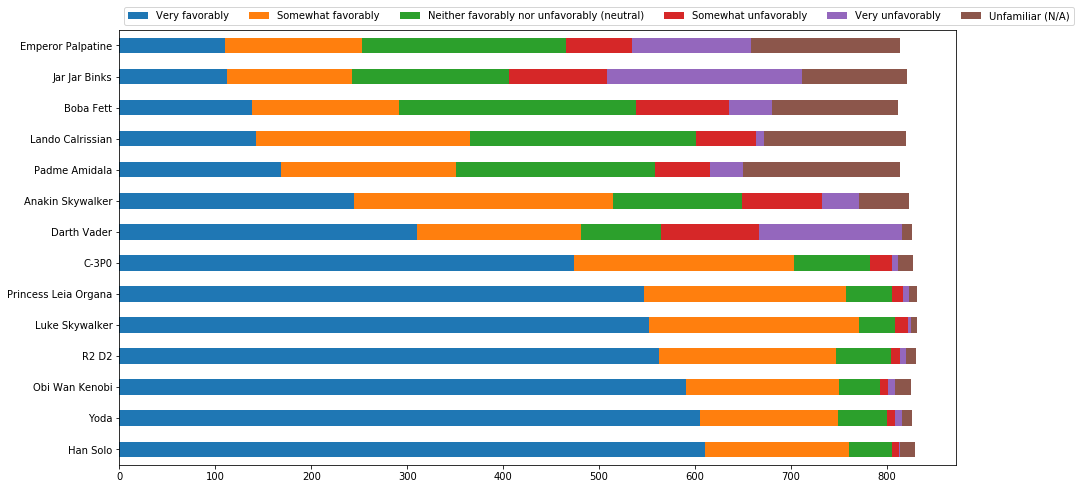

In [82]:
f = plt.figure(figsize = (15, 8))
favorability_df.plot(kind='barh', ax=f.gca(), stacked = True)
plt.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='medium')
plt.show()

The most favorable characters are Han Solo, Yoda, and Obi Wan Kenobi, but there are several other characters that are seen very favorably as well. Jar Jar Binks, Boba Fett, and Emperor Palpatine seem to be controversial characters, with pretty even numbers between favorability, unfavorability, and neither. Darth Vader is interestingly not an unfavorable character, with more people ranking him as very or somewhat favorable than very or somewhat unfavorable. 